In [1]:
!pip install numpy jax jaxlib matplotlib seaborn

# Equations of motion (2nd order ODEs)

We know that the motion of an object is determined by Newton’s
equations. In the one-dimensional case, we can define the instantaneous
position $y(t)$, velocity $v(t)$ and acceleration $a(t)$ of an object
using the language of differential calculus: 
$$v(t)=\frac{dy}{dt},
a(t)=\frac{dv}{dt}.
$$ 
The motion of the particle is defined by:
$\frac{d^2y}{dt^2}=\frac{F(t)}{m}$
This is a second order differential
equation that can written as two first order differential equations:
$$
\frac{dv}{dt}=\frac{F(t)}{m} \\
\frac{dy}{dt}v(t).$$ 
To solve it we can apply any of
the methods described in the previous sections. If we pick Euler’s, we
obtain: 

$$
\begin{align}
v_{n+1}&=&v_n+\frac{F(t)}{m}\Delta t = v_n+a_n\Delta t, \\
y_{n+1}&=&y_n+v_n\Delta t,\end{align}$$ 

where $a_n=F(t)/m$.
<!-- 
![forces1](figures/forces1.png).
#### Forces acting on an object: a) moving upward b) falling. -->

### Exercise 1.2: One dimensional motion
Write a program to solve the 1d equations of motion for a falling
object. Input values: 
- $y_0=y(t=0)$
- $v_0=v(t=0)$. 

Compare results with
different $\Delta t$ and the exact solution. Plot $y(t)$ and $v(t)$. Use
$y_0=10m$; $v_0=0$.


This is a godd time to introduce the concept of **objects** and object oriented programming in Python. We will first define a class "**particle**"

In [2]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.): # default values are assigned
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt): # updates the position and velocity by Euler's method
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        


We are now in position for a free falling particle. Let's start with imports and initializations

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams.update({'figure.dpi': 75, 'font.size': 10})

g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity

dt = 0.5           # time step

gforce = g*mass    # weight

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

Now we need a loop that solves the dynamics a long as the particle is above the ground.

In [4]:
while p.y > 0.: # use y-value of the particle to check if the particle has hit the ground
    fy = -gforce
    p.euler(fy, dt) # update the position and velocity of the particle by Euler
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

Let's plot the velocities and positions

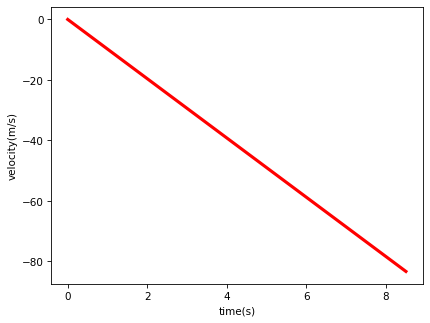

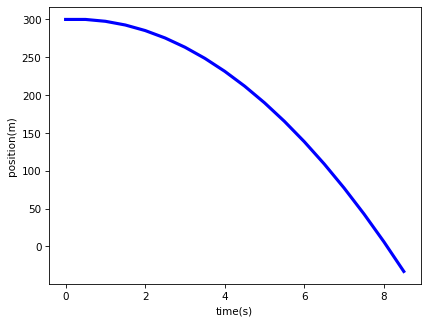

In [5]:
plt.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)')
plt.show()

plt.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
plt.ylabel('position(m)')
plt.xlabel('time(s)')
plt.show()

### Exercise 1.3: Air resistance 
The form of the velocity-dependent force of the resistance of the air is
given by $$F_d=kv$$ where $k$ is a parameter that depends on the
properties of the medium and the shape of the object. Since $F$
increases as $v$ increases, there is a limiting velocity at which
$F_d=F_g=mg$ and the acceleration vanishes:

$kv_t=mg \Rightarrow v_t=\frac{mg}{k}$

In terms of the terminal speed,
the force $F_d$ can be rewritten as $$F_d=mg(\frac{v}{v_t}).$$ Hence,
the net force on a falling object is: $$F=mg(1-\frac{v}{v_t})$$

Let's try a slightly different version of this problem where the force $F_d$ varies  with the square of the velocity $F_d=k_2 v^2.$ 

1.  Derive the net force on a falling object using this
    expression, in units of the terminal velocity $v_t$

2.  Compute the speed at which a pebble of mass $m=10^{-2}kg$ reaches
    the ground if it’s dropped from rest at $y_0=50m$. Compare this
    speed to that of a freely falling object under the same conditions.
    Assume that the drag force is proportional to $v^2$ and the terminal
    speed is $v_t=30m/s$

See Mathematica notebook for the detailed solution to 2. The drag and freefall final velocities are 3.49057 and 3.19438, respectively.

The program will look pretty much identical to the previous one, but we need to introduce the drag force

In [6]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 50.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
k2 = g*mass/vt**2  # drag coeff.

dt = 0.00001           # time step

gforce = g*mass    # weight

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

while p.y > 0.:
    fy = -gforce-k2*p.v*abs(p.v)
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print (i,t_data[i], y_data[i], v_data[i])

plt.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)');


print("last time is {}".format(t_data[-1]))

last time is 3.4905800000144


In [7]:
plt.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
plt.ylabel('position(m)');

Now we want to ignore drag, which can effectively be done by sending

$v_t \to \infty$

In [8]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 50.          # initial position
v0 = 0.            # initial velocity
vt = 1e10          # terminal velocity
k2 = g*mass/vt**2  # drag coeff.

dt = 0.00001           # time step

gforce = g*mass    # weight

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]

while p.y > 0.:
    fy = -gforce-k2*p.v*abs(p.v)
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print (i,t_data[i], y_data[i], v_data[i])

plt.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)');

print("last time is {}".format(t_data[-1]))

last time is 3.1943900000124597


Of course, this physics is rather simple, but seeing the result come out so well in the numerical experiment helps give us confidence in them.

We solved the diff eq directly via numerical techniques. However, for some problems with harder diff eqs it's not so easy, and different approaches are worth considering.

### Question: how could you do this problem with a neural network?

Two dimensional trajectories
----------------------------

In a 2d trajectory, the direction of the drag force is opposite to the
speed vector ${\bf v}$. Newton’s equations of motion for $x$ and $y$
components are written $$\begin{aligned}
&& m\frac{dv_x}{dt}=-F_{d,x}; \\
&& m\frac{dv_y}{dt}=-mg-F_{d,y};\end{aligned}$$ Using $F_d=kv^2$,
$v_x=v\cos{\theta}$ and $v_y=v\sin{\theta}$, we find $$\begin{aligned}
&& \frac{dv_x}{dt}=-\frac{k}{m}vv_x, \\ 
&& \frac{dv_y}{dt}=-g-\frac{k}{m}vv_y, \end{aligned}$$ where
$v^2=v_x^2+v_y^2$. Hence, we cannot calculate the vertical motion of the
object without reference to the horizontal component.

![forces2](figures/forces2.png)
#### Object in a two dimensional trajectory under the effect of gravitational and dragging forces}


### Exercise 1.7: Trajectory of a shot 

Modify your code so that the 2d trajectory of an object can be computed,
and graphs of $y$ as a function of $x$ can be made.

1.  As a check on your program, first neglect the effect of air
    resistance so that you an compare to known results. Supouse that the
    object is thrown and $t_0$ with an angle $\theta _0$ with an initial
    velocity $v_0=15$m/s. Vary $\theta_0$ and show that the maximum
    range occurs at $\theta_0=45^{\circ}$ Compare your result with the
    exact value $v_0^2/g$

2.  Consider the effects of air resistance. Compute the maximum range,
    and the corresponding angle using $k/m=0.1$, $v_0=30$m/s.



In [9]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

In [10]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

g = 9.8            # g acceleration
v0 = 30.           # initial velocity

dt = 0.1           # time step

colors = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']

for angle in range(1,9):
    x = [0]                                  # we need to initialize the arrays for each value of the angle
    y = [0]
    vx = [math.cos(angle*0.1*math.pi/2.)*v0] 
    vy = [math.sin(angle*0.1*math.pi/2.)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])
    while p.y >= 0.:
        fy = -g
        p.euler(0., fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) # we convert the list into a numpy array for plotting
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)

    my_plot = pyplot.plot(x_data, y_data, color=(colors[angle]), ls='-', lw=3, label = str(angle*0.1))
    pyplot.legend()

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)');

### Challenge 1.4: 

Modify the previous code to include the effect of drag resistance, and solve Exercise 1.7, part 2.

#### An introduction to animations with matplotlib

In [11]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.animation as animation
from IPython.display import HTML

g = 9.8            # g acceleration
dt = 0.01           # time step

x = np.array([0.])
y = np.array([0.])

fig = pyplot.figure()
ax = pyplot.axes(xlim=(0, 20), ylim=(0, 6), xlabel='distance x(m)', ylabel='distance y(m)')
points, = ax.plot([], [], marker='o', linestyle='None')

p = particle2(1., 0., 0., 10., 10.)

def init():
    points.set_data(x, y)
    return (points,)

def animate(i):
    if p.y >= 0 and i > 0:
        p.euler(0., -g, dt)
        x[0] = p.x
        y[0] = p.y
    points.set_data(x, y)
    return (points,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames = 200, interval=1)
HTML(anim.to_jshtml())


Stability
---------

A major consideration in integrating differential equations is the
numerical stability of the algorithm used. Since we have replaced the
differential equation by a difference equation, we know that our results
will not be exact. Discrepancies will arise when using different step
sizes, for instance. This is the “truncation error” and depends on the
method employed. Other errors that do not originate in the method
correspond to the roundoffs performed by the computer, since it does not
work with real numbers, but with a finite number of digits determined by
the hardware. These roundoff errors will accumulate and can become
significant in some cases.

In practice we determine the accuracy of our solutions by reducing the
value of the step until the solutions unchanged at the desired level of
accuracy.

In addition to accuracy, another important factor is the stability of
the algorithm. For instance, it may occur that the numerical results are
very good for short times, but diverge from the “true” solution for
longer times. Such an algorithm is said to be “unstable” for the
particular problem.







# Central Potential 

<div style="background-color: white;">
    <img src="figures/forces3.png" alt="Image description" />
</div>

#### An object of mass $m$ under the effects of a central force $F$.

# Kepler’s problem

The motion of the sun and the earth is an example of a two-body
problem. This is a relatively simple problem that can be solved
analytically (it interesting to notice here, however, that adding a new
object to the problem, the moon for instance, make it completely
intractable. This is the famous “three body problem”). We can assume
that, to a good approximation, the sun is stationary and is a convenient
origin of our coordinate system. This is equivalent to changing to a
center of mass coordinate system, where most of the mass is
concentrated in the sun. The problem can be reduced to an equivalent one
body problem involving an object of reduced mass $\mu$ given by

$\mu=\frac{mM}{m+M}$

Since the mass of the earth is
$m=5.99\times 10^{24}$ kg and the mass of the sun is
$M=1.99\times 10^{30}$ kg we find that for most practical purposes, the
reduced mass of the earth-sun system is that of the earth. Hence, in the
following we are going to consider the problem of a single particle of
mass $m$ moving about a fixed center of force, which we take as the
origin of the coordinate system. The gravitational force on the particle
m is given by 
${\mathbf F}=-\frac{GMm}{r^3}{\mathbf r},$
where the
vector ${\mathbf r}$ is directed from $M$ to $m$, and $G$ is the
gravitation constant 
$$G=6.67\times 10^{-11} \frac{m^3}{kg.s^2}$$
The
negative sign implies that the gravitational force is attractive, and
decreases with the separation $r$. The gravitational force is a “central
force”: its magnitude depends on the separation between the particles
and its direction is along the line that connects them. The assumption
is that the motion is confined to the $xy$ plane. The angular momentum
${\mathbf L}$ lies on the third direction $z$ and is a constant of
motion, <span>*i.e.*</span> it is conserved:

$$L_z=({\mathbf r}\times m{\mathbf v})_z=m(xv_y-yv_x)=\mathrm{const.}$$

An additional constant of motion ins the total energy $E$ given by

$$E=\frac{1}{2}mv^2-\frac{GmM}{r}$$

 If we fix the coordinate system in
the sun, the equation of motion is

$m\frac{d^2{\mathbf r}}{dt^2}=-\frac{mMG}{r^3}{\mathbf r}$

For
computational purposes it is convenient to write it down in cartesian
components: $$\begin{aligned}
&& F_x=-\frac{GMm}{r^2}\cos{\theta}=-\frac{GMm}{r^3}x, \\
&& F_y=-\frac{GMm}{r^2}\sin{\theta}=-\frac{GMm}{r^3}y.\end{aligned}$$
Hence, the equations of motions in cartesian coordinates are:
$$\begin{aligned}

&& \frac{d^2x}{dt}=-\frac{GM}{r^3}x, \\
&& \frac{d^2y}{dt}=-\frac{GM}{r^3}y, \end{aligned}$$ 

where
$r^2=x^2+y^2$. These are coupled differential equations, since each
differential equation contains both $x$ and $y$.

### Circular motion 

Since many planetary orbits are nearly circular, it is useful to obtain
the condition for a circular orbit. In this case, the magnitude of the
acceleration ${\mathbf a}$ is related to the radius by

$a=\frac{v^2}{r}$

where $v$ is the speed of the object. The
acceleration is always directed toward the center. Hence

$\frac{mv^2}{r}=\frac{mMG}{r^2}$

or 

$v=(\frac{MG}{r})^{1/2}.$

This is a general condition for the circular orbit.
We can also find the dependence of the period $T$ on the radius of a
circular orbit. Using the relation 

$T=\frac{2\pi r}{v},$

we obtain

$T^2=\frac{4\pi^2r^3}{GM}$

### Elliptical orbits 

An ellipse has two foci $F_1$ and $F_2$, and has the property that for
any point the distance $F_1P+F_2P$ is a constant. It also has a
horizontal semi-axis $a$ and a vertical $b$. It is common in astronomy
to characterize an orbit by its “eccentricity” $e$, given by the ratio
of the distance between the foci, and the length of the major axis $2a$.
Since $F_1P+F_2P=2a$, it is easy to show that (consider a point $P$ at
$x=0$,$y=b$) $$e=\sqrt{1-\frac{b^2}{a^2}},$$ with $0<e<1$. A special
case is $a=b$ for which the ellipse reduces to a circle and $e=0$. The
earth orbit has eccentricity $e=0.0167$.

### Astronomical units 
It is useful to choose a system of units where the product $GM$ is of
the order of unity. To describe the earth’s motion, the convention is to
choose the earth’s semi-major axis as the unit of length, called
“astronomical unit” (AU) and is $$1AU=1.496 \times 10^{11}m.$$ The unit
of time is taken to be “one year”, or $3.15 \times 10^7$s. In these
units, $T=1$yr, $a=1AU$, and we can write
$$GM=\frac{4\pi ^2a^3}{T^2}=4\pi ^2 AU^3/yr^2.$$

### Exercise 2.1: Simulation of the orbit 

1.  Write a program to simulate motion in a central force field. Verify
    the case of circular orbit using (in astronomical units) ($x_0=1$,
    $y_0=0$ and $v_x(t=0)=0$. Use the condition (\[circular\] to
    calculate $v_y(t=0)$ for a circular orbit. Choose a value of
    $\Delta 
    t$ such that to a good approximation the total energy $E$
    is conserved. Is your value of $\Delta t$ small enough to reproduce
    the orbit over several periods?

2.  Run the program for different sets of initial conditions $x_0$ and
    $v_y(t=0)$ consistent with the condition for a circular orbit. Set
    $y_0=0$ and $v_x(t=0)=0$. For each orbit, measure the radius and the
    period to verify Kepler’s third law ($T^2/a^3=\mathrm{const.}$).
    Think of a simple condition which allows you to find the numerical
    value of the period.

3.  Show that Euler’s method does not shield stable orbits for the same
    choice of $\Delta t$ used in the previous items. Is it sufficient to
    simply choose a smaller $\Delta t$ or Euler’s method is no stable
    for this dynamical system? Use the average velocity
    $1/2(v_n+v_{n+1})$ to obtain $x_{n+1}$. Are the results any better?

4.  Set $y_0=0$ and $v_x(t=0)=0$. By trial and error find several
    choices of $x_0$ and $v_y(t=0)$ which yield coonvinient
    elliptical orbits. Determine total energy, angular momentum,
    semi-major and semi-nimor axes, eccentricity, and period for
    each orbit.

5.  You probably noticed that Euler’s algorithm with a fixed $\Delta t$
    breaks down if you get to close to the sun. How are you able to
    visually confirm this? What is the cause of the failure of the
    method? Think of a simple modification of your program that can
    improve your results.



In [12]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt


v0y factor 0.5


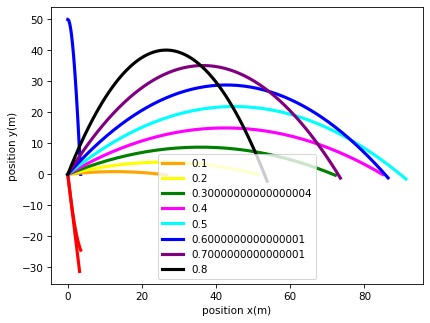

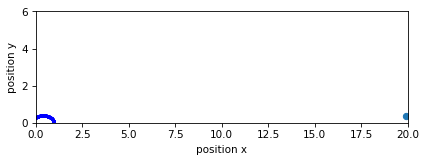


v0y factor 0.6


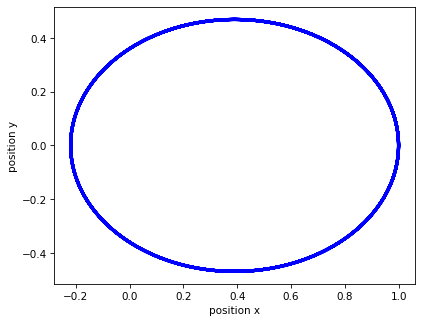


v0y factor 0.7


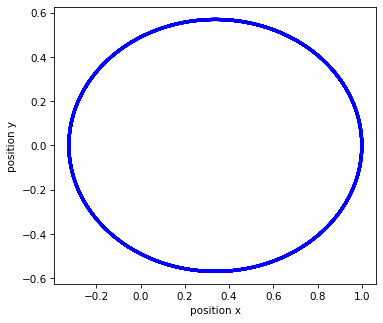


v0y factor 0.8


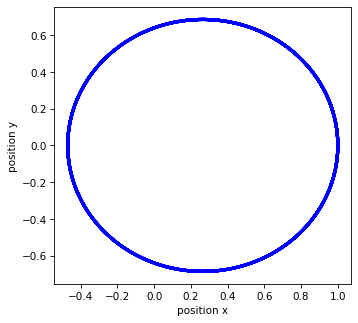


v0y factor 0.9


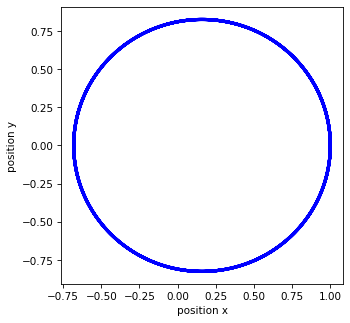


v0y factor 1.0


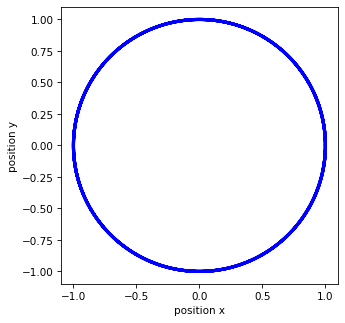


v0y factor 1.1


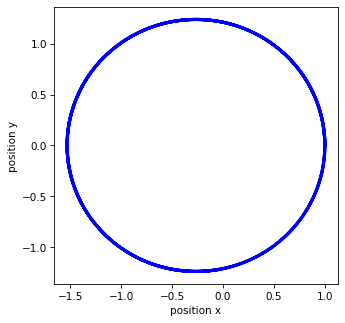


v0y factor 1.2


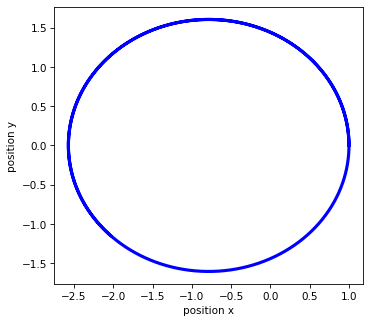


v0y factor 1.3


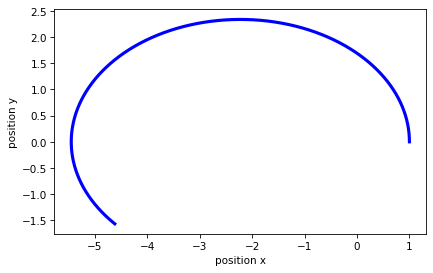


v0y factor 1.4


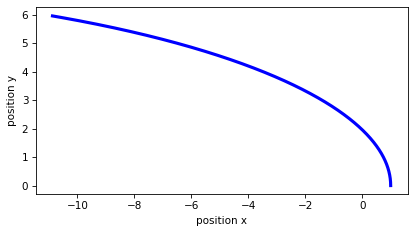


v0y factor 1.5


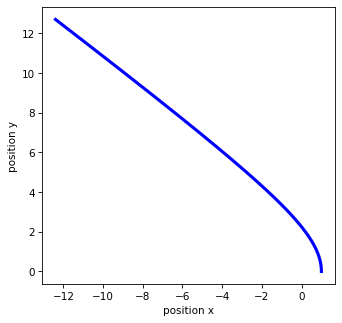

In [13]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ColorConverter as cc
import math

GM = 4*math.pi**2
r = 1                  # radius of the orbit
v0 = math.sqrt(GM/r)    # This is the condition for circular orbits 

x0 = r                  # initial position
y0 = 0.                 # we asume we start from the x axis
v0x = 0.                # and the initial velocity

dt = 0.00001                # time step
tmax = 4.
nsteps = int(tmax/dt)

v0ys = [v0*.1*k for k in range(5,16)]              # is perpendicular to the vector position. 

for v0y in v0ys:
    print('\nv0y factor',v0y/v0)
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    energy = np.zeros(nsteps)

    x[0] = x0
    y[0] = y0
    vx[0] = v0x
    vy[0] = v0y
    energy[0] = 0.5*(v0y**2+v0x**2) - GM/r

    p = particle2(1., x0, y0, v0x, v0y)

    for i in range(0,nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r3 = r * r * r
        fx = -GM*p.x/r3
        fy = -GM*p.y/r3
        p.euler(fx, fy, dt)

        x[i] = p.x
        y[i] = p.y
        vx[i] = p.vx
        vy[i] = p.vy
        energy[i] = 0.5*(p.vx**2+p.vy**2) - GM/r

    t = np.linspace(0.,tmax,nsteps)    

    plt.plot(x, y, color='blue', ls='-', lw=3)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.xlabel('position x')
    plt.ylabel('position y')
    plt.show()



In [14]:
plt.plot(t, energy, color='green', ls='-', lw=3)

plt.xlabel('time')
plt.ylabel('Energy');

In [15]:
plt.plot(t, x, color='red', ls='-', lw=3)

plt.xlabel('time')
plt.ylabel('position x');
plt.xlim(0,4);

### Challenge 2.1:

Modify the previous code to:

- Write the axis labels in the right units according to the previous discussion
- Answer Exercise 2.1, parts 2-5
- Modifly class particle2 to add a higher order method such as Runge-Kutta 


A mini solar system
-------------------

The presence of other planets implies that the total force on a planet
is no longer a central force. Furthermore, since the orbits are not
exactly on the same plane, the analysis must be extended to 3D. However,
for simplicity, we are going to consider a two-dimensional solar system,
with two planets in orbit around the sun.

The equations of motion of the two planets of mass $m_1$ and $m_2$ can
be written in vector form as $$\begin{aligned}
&& m_1\frac{d^2 {\mathbf r}_1}{dt^2}=-\frac{m_1MG}{r_1^3}{\mathbf 
r}_1+\frac{m_1m_2G}{r_{21}^3}{\mathbf r}_{21}, \\
&& m_2\frac{d^2 {\mathbf r}_2}{dt^2}=-\frac{m_2MG}{r_2^3}{\mathbf 
r}_2+\frac{m_1m_2G}{r_{21}^3}{\mathbf r}_{21},\end{aligned}$$ where
${\mathbf r}_1$ and ${\mathbf r}_2$ are directed form the sun to the
planets, and ${\mathbf r}_{21}={\mathbf r}_2-{\mathbf r}_1$ is the
vector from planet 1 to planet 2. This is a problem with no analytical
solution, but its numerical solution can be obtained extending our
previous analysis for the two-body problem.

### Exercise 2.2: A three body problem 

Let us consider astronomical units, and values for the masses
$m_1/M=0.001$ and $m_2/M=0.01$. Consider initial positions $r_1=1$ and
$r_2=4/3$ and velocities ${\mathbf v}_{1,2}=(0,\sqrt{GM/r_{1,2}})$.

1.  Write a program to calculate the trajectories of the two planets,
    and plot them.

2.  What would the shape and the periods of the orbits be if the don’t
    interact? What is the qualitative effect of the interaction. Why is
    one planet affected more by the interaction that the other? Are the
    angular momentum and energy of planet 1 conserved? Is the total
    momentum an energy of the two planets conserved?



In [16]:
NPLANETS = 2

m1 = 0.1
r1 = 1.                  # radius of the orbit
v1 = math.sqrt(GM/r1)    # This is the condition for circular orbits 

m2 = 0.01
r2 = 4./3.               # radius of the orbit
v2 = math.sqrt(GM/r2)    # This is the condition for circular orbits 

dt = 0.001               # time step
tmax = 2.
nsteps = int(tmax/dt)

x = np.zeros(shape=(nsteps,NPLANETS))
y = np.zeros(shape=(nsteps,NPLANETS))
vx = np.zeros(shape=(nsteps,NPLANETS)) 
vy = np.zeros(shape=(nsteps,NPLANETS))
energy = np.zeros(shape=(nsteps,NPLANETS))

x[0,0] = r1
y[0,0] = 0.
vx[0,0] = 0.
vy[0,0] = v1
energy[0][0] = 0.5*v1**2 - GM/r1
x[0,1] = r2
y[0,1] = 0.
vx[0,1] = 0.
vy[0,1] = v2
energy[0][1] = 0.5*v2**2 - GM/r2

planets = [particle2]
for i in range(1,NPLANETS):        # create a list of NPLANETS particle2's
    planets.append([particle2])

m = [m1, m2]
for i in range(NPLANETS):
    planets[i] = particle2(m[i], x[0,i], y[0,i], vx[0,i], vy[0,i])

for i in range(1,nsteps):
    for n in range(0,NPLANETS):
        r = math.sqrt(planets[n].x*planets[n].x+planets[n].y*planets[n].y);
        r3 = r * r * r;
        fx = -GM*planets[n].mass*planets[n].x/r3;
        fy = -GM*planets[n].mass*planets[n].y/r3;
        planets[n].euler(fx, fy, dt)

        x[i,n] = planets[n].x
        y[i,n] = planets[n].y
        vx[i,n] = planets[n].vx
        vy[i,n] = planets[n].vy
        energy[i,n] = 0.5*(planets[n].vx**2+planets[n].vy**2) - GM/r

t = np.linspace(0.,tmax,nsteps)    


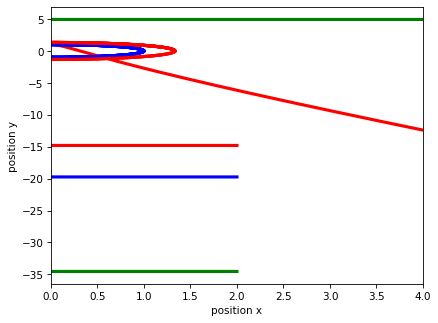

In [20]:
plt.plot(x[:,0], y[:,0], color='blue', ls='-', lw=3)
plt.plot(x[:,1], y[:,1], color='red', ls='-', lw=3)

plt.xlabel('position x')
plt.ylabel('position y')
plt.show()

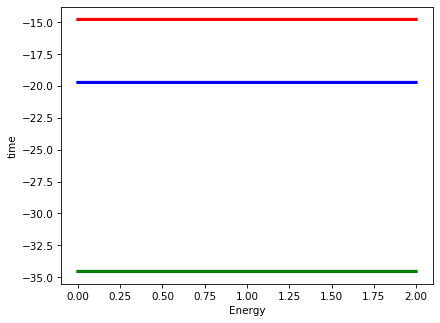

In [21]:
plt.plot(t, energy[:,0], color='blue', ls='-', lw=3, label='Planet 1')
plt.plot(t, energy[:,1], color='red', ls='-', lw=3, label = 'Planet 2')
plt.plot(t, energy[:,0]+energy[:,1], color='green', ls='-', lw=3, label = 'Both planets')

plt.xlabel('Energy')
plt.ylabel('time')

plt.show()

In this particular case, since both planets do not interact, the individual energies are conserved.

### Challenge 2:2:

Modify the previous code to introduce the gravitational interaction between planets, and repeat the calculations. Consider masses $m_1=0.1$ and $m_2=0.01$, and the initial positions ${\bf r}_1=(1,0)$ and ${\bf r}_2=(-3,0)$, with velocities corresponding to circular orbits. Plot the orbits for 5 periods, and the individual and total energies.
